,Item Set,Support
69,"(mineral water,)",0.238336
34,"(eggs,)",0.179685
96,"(spaghetti,)",0.174087
40,"(french fries,)",0.170888
23,"(chocolate,)",0.163823
51,"(green tea,)",0.132098
68,"(milk,)",0.129565
52,"(ground beef,)",0.098240
46,"(frozen vegetables,)",0.095308
78,"(pancakes,)",0.095041


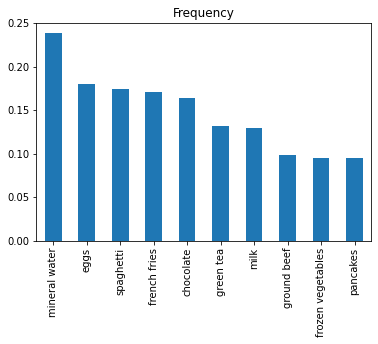

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

df.stack().value_counts(normalize=True)[:10].plot(kind='bar', title='Relative Frequency')

df.stack().value_counts().apply(lambda item: item / df.shape[0])[:10].plot(kind='bar', title='Frequency') # Frequency

transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)


#!pip install apyori
from apyori import apriori
rules = apriori(transactions=transactions, 
                min_support=0.004, # how frequent is your item(s) in the dataset
                min_length=2, 
                max_length=0)
results = list(rules)

def inspect(results):
    item_sets = []
    supports = [] 
    for result in results:
        item_sets.append(tuple(result[0]))
        supports.append(result[1])
    return list(zip(item_sets, supports))
results_df = pd.DataFrame(inspect(results),
                          columns = ['Item Set', 'Support'])


pd.set_option('display.max_rows', df.shape[0])
results_df.sort_values('Support', ascending=False)[:100]

In [ ]:
!pip install apyori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=98e3a339025bdbfb7d34a93a1795ccd37894809253e800acaf943becf2ead234
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
